## Sionna 1.0.2 Update

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import drjit as dr
import mitsuba as mi
import numpy as np

# Import or install Sionna
try:
    import sionna.rt
except ImportError as e:
    import os
    os.system("pip install sionna-rt")
    import sionna.rt

no_preview = True # Toggle to False to use the preview widget
                  # instead of rendering for scene visualization

from sionna.rt import load_scene, PlanarArray, Transmitter, Receiver, Camera,\
                      PathSolver, ITURadioMaterial, SceneObject

In [2]:
scene = load_scene(sionna.rt.scene.etoile) # Objects are merged by default

cam = Camera(position=[-360,145,400], look_at=[-115,33,1.5])
if no_preview:
    scene.render(camera=cam);
    p
else:
    scene.preview();

In [3]:
# Number of cars to add
num_cars = 10

# Radio material constituing the cars
# We use ITU metal, and use red color for visualization to
# make the cars easily discernible
car_material = ITURadioMaterial("car-material",
                                "metal",
                                thickness=0.01,
                                color=(0.8, 0.1, 0.1))

# Instantiate `num_cars` cars sharing the same mesh and material
cars = [SceneObject(fname=sionna.rt.scene.low_poly_car, # Simple mesh of a car
                    name=f"car-{i}",
                    radio_material=car_material)
        for i in range(num_cars)]

# Add the list of newly instantiated objects to the scene
scene.edit(add=cars)

if no_preview:
    scene.render(camera=cam);
else:
    scene.preview();

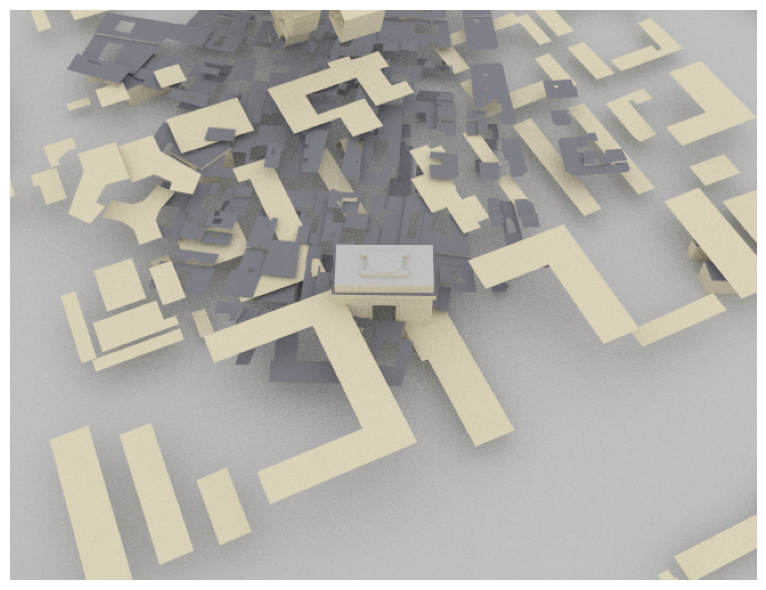

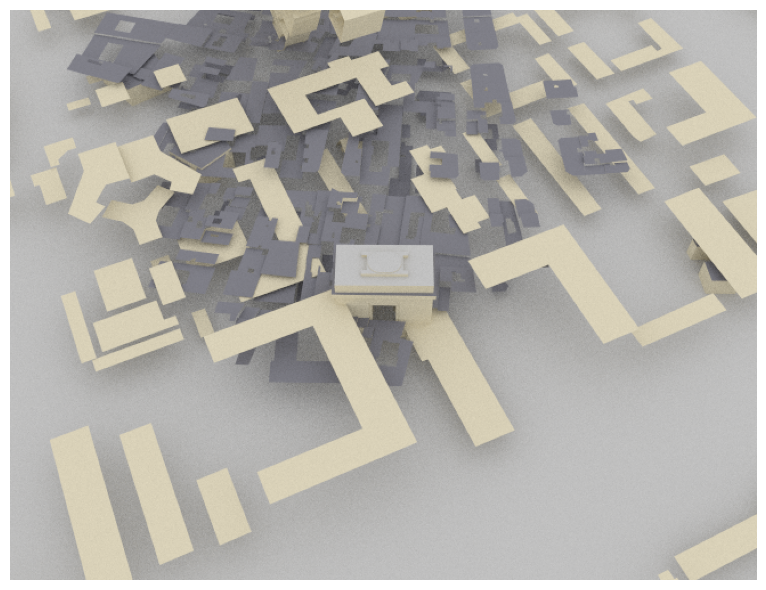

In [4]:
plt.show()

In [5]:
from utils.options import args_parser
from utils.sumo_utils import read_trajectoryInfo_timeindex
import sys
sys.argv = ['']

args = args_parser()
"""args.slots_per_frame = 100
args.beta_macro = 3
args.beta_micro = 4
args.bias_macro = -60
args.bias_micro = -60
args.shd_sigma_macro = 0
args.shd_sigma_micro = 0
args.num_RB_macro = 100
args.num_RB_micro = 100
args.RB_intervel_macro = 0.18 * 1e6
args.RB_intervel_micro = 1.8 * 1e6
args.p_macro = 1
args.p_micro = 0.1
args.data_rate = 0.7 * 1e6"""
args.trajectoryInfo_path = '/home/ubuntu/niulab/Sionna/sumo_result/trajectory_Lbd0.10.csv'
start_time=500
end_time=500.5
scene_time = 500
pattern = "tr38901"
# pattern = "iso"
h_rx = 10
h_tx = 30


trajectoryInfo = read_trajectoryInfo_timeindex(
    args,
    start_time=start_time,
    end_time=end_time,
    display_intervel=0.05,
)

In [3]:
# scene = sionna.rt.load_scene('scene_NoBuildings.xml')
# scene = sionna.rt.load_scene('scene_NoItem.xml')
scene = sionna.rt.load_scene('scene_self_defined_v2.xml',merge_shapes=False)

In [6]:
for i,v in enumerate(trajectoryInfo[scene_time].values()):
    x, y = v['pos']
    v, angle = v['v'], v['angle']
    v_x, v_y = v*np.cos(angle), v*np.sin(angle)
    print(i, x, y, angle)

0 -234.4907623316222 242.0 90.0
1 -233.90895688376108 245.2 90.0
2 -258.1348555549467 249.18173648923835 81.86021944064103
3 -264.0568676129027 248.4 90.0
4 -247.82516704291265 242.0 90.0
5 -247.5639294363254 245.2 90.0
6 -259.38825325988245 242.0 90.0
7 -269.86408409833655 242.0 90.0
8 -259.37234622729574 245.2 90.0
9 -479.8489735866169 242.0 90.0
10 -492.16699442654095 242.0 90.0
11 -254.8 -418.2821927459297 180.0
12 251.47947388340455 262.7563171838319 8.130102354155742
13 294.18532408698167 242.0 90.0
14 -465.3734180150841 -242.0 270.0
15 167.82279272280314 242.0 90.0
16 -377.76648918763254 258.0 270.0
17 -254.8 137.96329276164096 180.0
18 -143.34940117297168 248.4 90.0
19 -327.0891251599206 258.0 270.0
20 -258.0 264.6010000601026 180.0
21 -251.6 374.4272339303563 180.0
22 -258.0 468.08198013178315 180.0
23 -254.8 486.5305414528552 180.0
24 140.97421372482057 -242.0 270.0
25 -242.0 269.3725454801971 0.0
26 242.0 -235.66186130029357 180.0
27 -239.67915089981076 258.84749053988645 27

In [7]:
car_positions = []
car_velocities = []
rx_positions = []
rx_velocities = []
scene_time = 500


# for i,(k,v) in enumerate(trajectoryInfo[scene_time].items()):
#     # 强行修改车辆位置
#     xxx = 300
#     yyy = 100
#     trajectoryInfo[scene_time][k]['pos'] = np.array([np.random.uniform(xxx,xxx),np.random.uniform(yyy,yyy)])
#     #print(trajectoryInfo[scene_time][k]['pos'])
        
for i,v in enumerate(trajectoryInfo[scene_time].values()):
    print(i, x, y)
    car = scene.get(f'Car.{i+1}')
    x, y = v['pos']
    v, angle = v['v'], v['angle']
    v_x, v_y = v*np.cos(angle), v*np.sin(angle)

    # new_orientation = (np.pi/2, 0,  0) # TODO: debug
    car.orientation = ((angle/180+0.5)*np.pi, 0,  0)
    car.position = mi.Point3f(x.item(), y.item(), 1.4)
    car.velocity = mi.Point3f(v_x.item(), v_y.item(), 0)
    rx_positions.append([x,y,h_rx])
    
# car = scene.get('Car.1')
# car.position = [250,-250,1.4]
# car.look_at([car.position[0]+np.cos(theta),car.position[1]+np.sin(theta),car.position[2]])
#new_orientation = (np.pi/2, 0,  0)
#car.orientation = type(car.orientation)(new_orientation)
#car.orientation = type(car.orientation)(new_orientation, device=car.orientation.device)
#car.orientation = [0,0,0]

0 -318.0707787936133 -254.8
1 -234.4907623316222 242.0
2 -233.90895688376108 245.2
3 -258.1348555549467 249.18173648923835
4 -264.0568676129027 248.4
5 -247.82516704291265 242.0
6 -247.5639294363254 245.2
7 -259.38825325988245 242.0
8 -269.86408409833655 242.0
9 -259.37234622729574 245.2
10 -479.8489735866169 242.0
11 -492.16699442654095 242.0
12 -254.8 -418.2821927459297
13 251.47947388340455 262.7563171838319
14 294.18532408698167 242.0
15 -465.3734180150841 -242.0
16 167.82279272280314 242.0
17 -377.76648918763254 258.0
18 -254.8 137.96329276164096
19 -143.34940117297168 248.4
20 -327.0891251599206 258.0
21 -258.0 264.6010000601026
22 -251.6 374.4272339303563
23 -258.0 468.08198013178315
24 -254.8 486.5305414528552
25 140.97421372482057 -242.0
26 -242.0 269.3725454801971
27 242.0 -235.66186130029357
28 -239.67915089981076 258.84749053988645
29 245.2 -382.27509983413654
30 248.4 -393.784444260276
31 -270.7396973240407 251.6
32 242.0 -230.35188594200193
33 -228.67122525780414 258.0
34

In [8]:
# Configure antenna array for all transmitters
scene.tx_array = PlanarArray(num_rows=1,
                             num_cols=64,
                             vertical_spacing=0.5,
                             horizontal_spacing=0.5,
                             pattern=pattern,
                             polarization="V")

# Configure antenna array for all receivers
scene.rx_array = PlanarArray(num_rows=1,
                             num_cols=1,
                             vertical_spacing=0.5,
                             horizontal_spacing=0.5,
                             pattern=pattern,
                             polarization="V")

# Create transmitter
tx1 = Transmitter(name="tx_1",
                 position=[300,300,h_tx])
tx2 = Transmitter(name="tx_2",
                 position=[-300,300,h_tx])
tx3 = Transmitter(name="tx_3",
                 position=[300,-300,h_tx])
tx4 = Transmitter(name="tx_4",
                 position=[-300,-300,h_tx])

# Add transmitter instance to scene
scene.remove(f"tx_1");scene.remove(f"tx_2");scene.remove(f"tx_3");scene.remove(f"tx_4")
scene.add(tx1)
scene.add(tx2)
scene.add(tx3)
scene.add(tx4)

#look_at [0,0,0]
# tx1.look_at([0,0,0])
# tx2.look_at([0,0,0])
# tx3.look_at([0,0,0])
# tx4.look_at([0,0,0])
tx1.look_at([0,0,h_tx])
tx2.look_at([0,0,h_tx])
tx3.look_at([0,0,h_tx])
tx4.look_at([0,0,h_tx])


# Create a receiver
for i,v in enumerate(trajectoryInfo[scene_time].values()):
    scene.remove(f"rx_{i+1}")
    rx = Receiver(name=f"rx_{i+1}",
                  position=[float(rx_positions[i][0]),float(rx_positions[i][1]),float(rx_positions[i][2])],
                  display_radius=2)
    
    # Add receiver instance to scene
    scene.add(rx)

# tx.look_at(rx) # Transmitter points towards receiver

scene.frequency = 5.9e9 # in Hz; implicitly updates RadioMaterials

scene.synthetic_array = True # If set to False, ray tracing will be done per antenna element (slower for large arrays)

In [9]:
Road_horizontal1 = scene.get('Road_horizontal1')
Road_horizontal1.radio_material = 'itu_concrete'
Road_horizontal2 = scene.get('Road_horizontal2')
Road_horizontal2.radio_material = 'itu_concrete'
Road_vertical1 = scene.get('Road_vertical1')
Road_vertical1.radio_material = 'itu_concrete'
Road_vertical2 = scene.get('Road_vertical2')
Road_vertical2.radio_material = 'itu_concrete'


# # Compute propagation paths
# paths = scene.compute_paths(max_depth=0,
#                             num_samples=1e6)  # Number of rays shot into directions defined
#                                               # by a Fibonacci sphere , too few rays can
#                                               # lead to missing paths

# # Visualize paths in the scene
# if no_preview:
#     scene.render("my_cam", paths=None, show_devices=True, show_paths=True, resolution=resolution);
# #%%skip_if no_preview
# scene.preview(None, show_devices=True, show_paths=True) # Use the mouse to focus on the visualized paths


p_solver = PathSolver()
paths = p_solver(scene, max_depth=1)

scene.preview(paths=paths);

# if no_preview:
#     scene.render(camera=cam, paths=paths);
# else:
#     scene.preview(paths=paths);

In [10]:
# Show the coordinates of the starting points of all rays.
# These coincide with the location of the transmitters.
print("Source coordinates: \n", paths.sources.numpy())
print("Transmitter coordinates: \n", list(scene.transmitters.values())[0].position.numpy())

# Show the coordinates of the endpoints of all rays.
# These coincide with the location of the receivers.
print("Target coordinates: \n",paths.targets.numpy())
print("Receiver coordinates: \n",list(scene.receivers.values())[0].position.numpy())

# Show the types of all paths:
# 0 - LoS, 1 - Reflected, 2 - Diffracted, 3 - Scattered
# Note that Diffraction and scattering are turned off by default.
# print("Path types: ", paths.types.numpy())

Source coordinates: 
 [[ 300. -300.  300. -300.]
 [ 300.  300. -300. -300.]
 [  30.   30.   30.   30.]]
Transmitter coordinates: 
 [[300.]
 [300.]
 [ 30.]]
Target coordinates: 
 [[-234.49077  -233.90895  -258.13486  -264.05685  -247.82516  -247.56393
  -259.38824  -269.86407  -259.37234  -479.84897  -492.167    -254.8
   251.47948   294.18533  -465.3734    167.8228   -377.76648  -254.8
  -143.3494   -327.0891   -258.       -251.6      -258.       -254.8
   140.97421  -242.        242.       -239.67915   245.2       248.4
  -270.7397    242.       -228.67122  -206.07713  -154.49146   248.4
    19.313     242.        248.4       248.4       242.       -252.85141
  -240.82178  -266.26266  -230.02      242.       -267.41055   250.43073
   258.8841    258.        267.18912   277.23264   302.9725   -242.
  -242.       -266.55725  -245.2      -265.32156  -249.90604  -240.35219
   233.95476   252.24168   332.61493   384.12808   437.29123  -240.98862
  -230.3812    352.28354  -207.56822   254.8

In [ ]:
paths_dict = paths.to_dict()
print(paths_dict.keys())
[batch_size, num_rx, num_rx_ant, num_tx, num_tx_ant, max_num_paths, num_time_steps] = paths_dict['a'].shape
print('batch_size=', batch_size)
print('num_rx=', num_rx)
print('num_rx_ant=',num_rx_ant)
print('num_tx=', num_tx)
print('num_tx_ant=', num_tx_ant)
print('max_num_paths=', max_num_paths)
print('num_time_steps=', num_time_steps)

In [ ]:
# We can now access for every path the channel coefficient, the propagation delay,
# as well as the angles of departure and arrival, respectively (zenith and azimuth).

# Let us inspect a specific path in detail
path_idx = 0 # Try out other values in the range [0, 13]
rx_id = 0
tx_id = 3
# For a detailed overview of the dimensions of all properties, have a look at the API documentation
print(f"\n--- Detailed results for path {path_idx} ---")
print(f"Channel coefficient: {paths.a[0,rx_id,0,tx_id,0,path_idx, 0].numpy()} {np.abs(paths.a[0,rx_id,0,tx_id,0,path_idx, 0].numpy())} {np.angle(paths.a[0,rx_id,0,tx_id,0,path_idx, 0].numpy())/np.pi*180} degree")
print(f"Propagation delay: {paths.tau[0,rx_id,tx_id,path_idx].numpy()*1e6:.5f} us")
print(f"Zenith angle of departure: {paths.theta_t[0,rx_id,tx_id,path_idx]:.4f} rad, {paths.theta_t[0,rx_id,tx_id,path_idx]/np.pi*180:.4f} degree")
print(f"Azimuth angle of departure: {paths.phi_t[0,rx_id,tx_id,path_idx]:.4f} rad, {paths.phi_t[0,rx_id,tx_id,path_idx]/np.pi*180:.4f} degree")
print(f"Zenith angle of arrival: {paths.theta_r[0,rx_id,tx_id,path_idx]:.4f} rad, {paths.theta_r[0,rx_id,tx_id,path_idx]/np.pi*180:.4f} degree")
print(f"Azimuth angle of arrival: {paths.phi_r[0,rx_id,tx_id,path_idx]:.4f} rad, {paths.phi_r[0,rx_id,tx_id,path_idx]/np.pi*180:.4f} degree")

In [ ]:
from sionna.ofdm import ResourceGrid
rg = ResourceGrid(num_ofdm_symbols=1024,
                  fft_size=1024,
                  subcarrier_spacing=30e3)

delay_resolution = rg.ofdm_symbol_duration/rg.fft_size
print("Delay   resolution (ns): ", int(delay_resolution/1e-9))

doppler_resolution = rg.subcarrier_spacing/rg.num_ofdm_symbols
print("Doppler resolution (Hz): ", int(doppler_resolution))

a = paths_dict['a']
tau = paths_dict['tau']
frequencies = tf.ones([1]) * 5.9e9
frequencies = subcarrier_frequencies(rg.fft_size, rg.subcarrier_spacing)
channel_gains = cir_to_ofdm_channel(frequencies,a,tau)[0,:,0,:,:,0,:]
# channel_gains = cir_to_ofdm_channel(frequencies,a,tau)
channel_gains.shape

In [ ]:
from sionna.ofdm import ResourceGrid
rg = ResourceGrid(num_ofdm_symbols=1024,
                  fft_size=1024,
                  subcarrier_spacing=30e3)

delay_resolution = rg.ofdm_symbol_duration/rg.fft_size
print("Delay   resolution (ns): ", int(delay_resolution/1e-9))

doppler_resolution = rg.subcarrier_spacing/rg.num_ofdm_symbols
print("Doppler resolution (Hz): ", int(doppler_resolution))

a = paths_dict['a']
tau = paths_dict['tau']
frequencies = subcarrier_frequencies(rg.fft_size, rg.subcarrier_spacing)
channel_gains = cir_to_ofdm_channel(frequencies,a,tau)
# channel_gains = cir_to_ofdm_channel(frequencies,a,tau)
channel_gains.shape # TensorShape([1, 97, 1, 4, 64, 1, 1024])

In [ ]:
plt.figure()
for tx_ant_id in range(60):
    plt.plot(tf.abs(channel_gains[0,rx_id,0,tx_id,tx_ant_id,0,:]))
plt.show()

In [ ]:
np.abs(paths.a[0,rx_id,0,tx_id,tx_ant_id,:, 0].numpy()), np.angle(paths.a[0,rx_id,0,tx_id,tx_ant_id,:, 0].numpy()), np.abs(paths.a[0,rx_id,0,tx_id,tx_ant_id,:, 0].numpy().sum()),  tf.abs(channel_gains[0,rx_id,0,tx_id,tx_ant_id,0,:]).numpy().max()

In [ ]:
yyy = np.sort(np.abs(channel_gains.numpy().reshape(-1)))[::-1]
plt.figure()
plt.plot(20*np.log10(yyy))
plt.show()

In [ ]:
# 设置参数
N_t = 64  # 发射天线数
N_r = 1   # 接收天线数

# 生成 DFT 码本
def generate_dft_codebook(N_t,N_codes=None):
    # 创建 DFT 矩阵
    # 这就是 N_t 个基向量的矩阵，包含 N_t 列，每列是一个 DFT 基向量
    if N_codes==None:
        dft_matrix = np.exp(-1j * 2 * np.pi * np.outer(np.arange(N_t), np.arange(N_t)) / N_t)
    else:
        dft_matrix = np.exp(-1j * 2 * np.pi * np.outer(np.arange(N_t), np.arange(N_codes)) / N_codes)
    return dft_matrix
DFT_matrix = generate_dft_codebook(N_t,N_codes=N_t)

In [ ]:
import math
def cal_angle(src,dst,src_face_angle=0):
    aaa = dst-src
    bbb = np.arctan2(aaa[1],aaa[0]) / np.pi * 180
    bbb = bbb - src_face_angle
    bbb = bbb % 360
    if bbb > 180:
        bbb -= 360
    return bbb
    
def boundfunc(a):
    a_shape = a.shape
    a = a.reshape(-1)
    for i in range(len(a)):
        a[i] = a[i] if a[i]<=1 else a[i] -2
    a = a.reshape(a_shape)
    return a
    
optimal_beam_list = []
l_bs1=np.array([300,300]).astype(np.float64)
l_bs2=np.array([-300,300]).astype(np.float64)
l_bs3=np.array([300,-300]).astype(np.float64)
l_bs4=np.array([-300,-300]).astype(np.float64)

h_v_t_list = []
l_v_t_list = []

for i,(v, v_state) in enumerate(trajectoryInfo[scene_time].items()):
    h_v_t = channel_gains[0,i,0,:,:,0,0]  # channel_gains.shape = TensorShape([1, 97, 1, 4, 64, 1, 1024])
    h_v_t_list.append(h_v_t)
    #print(trajectoryInfo[scene_time][v]['pos'])
    l_v_t = trajectoryInfo[scene_time][v]['pos']
    l_v_t_list.append(l_v_t)
    optimal_beam = np.abs(np.dot(h_v_t,DFT_matrix)).argmax(axis=-1)
    optimal_beam_list.append(optimal_beam)
optimal_beam_list = np.array(optimal_beam_list)


plt.figure()
for l_v_t in l_v_t_list:
    plt.scatter(l_v_t[0],l_v_t[1],color='blue')
plt.scatter(l_bs1[0],l_bs1[1],label='bs',color='r')
plt.text(l_bs1[0],l_bs1[1],'1')
plt.scatter(l_bs2[0],l_bs2[1],label='bs',color='r')
plt.text(l_bs2[0],l_bs2[1],'2')
plt.scatter(l_bs3[0],l_bs3[1],label='bs',color='r')
plt.text(l_bs3[0],l_bs3[1],'3')
plt.scatter(l_bs4[0],l_bs4[1],label='bs',color='r')
plt.text(l_bs4[0],l_bs4[1],'4')
plt.legend()
plt.xlim([-600,600])
plt.ylim([-600,600])
plt.show()
print('vehicle num:',len(h_v_t_list))

see_v_index = 3
l_v_t = l_v_t_list[see_v_index]
# cal_angle(src=l_bs1,dst=l_v_t,src_face_angle=-135), optimal_beam_list[-1,:]
AoDs = cal_angle(src=l_bs1,dst=l_v_t_list[see_v_index],src_face_angle=-135), cal_angle(src=l_bs2,dst=l_v_t_list[see_v_index],src_face_angle=-45), cal_angle(src=l_bs3,dst=l_v_t_list[see_v_index],src_face_angle=135), cal_angle(src=l_bs4,dst=l_v_t_list[see_v_index],src_face_angle=45), 
AoDs = np.array(AoDs)
# wrong: AoOB = optimal_beam_list[see_v_index,:]/N_t*360

AoOB = np.arcsin(boundfunc(2*optimal_beam_list[see_v_index,:]/N_t))/np.pi*180

AoDs,AoOB

In [ ]:
plt.plot(np.abs(np.dot(h_v_t,DFT_matrix))[0])
plt.show()

In [ ]:
from collections import Counter
# Counter(optimal_beam_list[:,0])
np.bincount(optimal_beam_list[:,0].reshape(-1))
plt.figure()
for i in range(4):
    plt.plot(np.bincount(optimal_beam_list[:,i]),label=i)
plt.xlabel('beam index')
plt.ylabel('optimal times')
plt.title('Optimal Beam statistics')
plt.show()

In [ ]:
from collections import Counter
optimal_beam_direction_list = np.arcsin(boundfunc(2*optimal_beam_list/N_t))/np.pi*180

# optimal_beam_direction_list = optimal_beam_direction_list + (optimal_beam_direction_list<0)*360

plt.figure()
for i in range(4):
    plt.hist(optimal_beam_direction_list[:,i], bins=64,label=i)
    plt.xlim([-90,90])
plt.legend()
plt.xlabel('Angles')
plt.ylabel('optimal times')
plt.title('Optimal Beam Angle Statistics')
plt.show()

In [ ]:
angle_list = np.zeros_like(optimal_beam_list).astype(np.float64)
src_face_angle_list = [-135,45,135,45]
for v_id, l_v in enumerate(l_v_t_list):
    for bs_id, l_bs in enumerate([l_bs1, l_bs2, l_bs3, l_bs4]):
        angle_list[v_id, bs_id] = cal_angle(src=l_bs,dst=l_v,src_face_angle=src_face_angle_list[bs_id])

angle_list = angle_list + (angle_list<-90)*180 - (angle_list>90)*180
# angle_list = angle_list + (angle_list<0)*360

from collections import Counter
plt.figure()
for i in range(4):
    plt.hist(angle_list[:,i], bins=64,label=i)
    plt.xlim([-90,90])
plt.legend()
plt.xlabel('Angles')
plt.ylabel('Times')
plt.title('Angle between BS and Car')
plt.show()